<a href="https://colab.research.google.com/github/Pillalamarrivyshnavi/2216155_AIML_Bootcamp_2023/blob/main/Naive_Bayes_Malaria(Correlation_matrix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/outbreak_detect.csv")

In [2]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [4]:
df.shape

(26, 7)

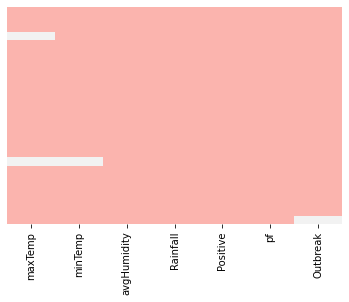

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')
  return plt.show()#gist_rainbow
get_heatmap(df)

In [6]:
median_maxTemp=df['maxTemp'].median()
print(median_maxTemp)

33.5


In [7]:
median_minTemp=df['minTemp'].median()
print(median_minTemp)

24.0


In [8]:
df['maxTemp']=df['maxTemp'].fillna(median_maxTemp)
df['minTemp']=df['minTemp'].fillna(median_minTemp)

In [9]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,33.5,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes
6,31.0,24.0,88.77,41.40,10881,648,Yes
7,33.0,24.0,77.94,23.88,8830,459,Yes
8,31.0,24.0,84.57,11.15,9693,482,No
9,36.0,24.0,53.40,2.12,9310,549,No


In [10]:
from sklearn import preprocessing

#label encoding
LE=preprocessing.LabelEncoder()

#fitting the technique to dataset
df.Outbreak=LE.fit_transform(df.Outbreak) #converting variables to numeric values
df.head(26)

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,0
1,34.0,23.0,83.27,15.22,10717,677,1
2,40.0,23.0,50.74,0.00,1257,127,0
3,33.5,24.0,84.57,11.15,9693,482,0
4,34.0,24.0,59.16,9.06,4198,211,0
5,34.0,27.0,73.23,0.00,11808,712,1
6,31.0,24.0,88.77,41.40,10881,648,1
7,33.0,24.0,77.94,23.88,8830,459,1
8,31.0,24.0,84.57,11.15,9693,482,0
9,36.0,24.0,53.40,2.12,9310,549,0


In [11]:
median_Outbreak=df['Outbreak'].median()
print(median_Outbreak)

0.0


In [12]:
df['Outbreak']=df['Outbreak'].replace(2,0)
print(df)

    maxTemp  minTemp  avgHumidity  Rainfall  Positive   pf  Outbreak
0      29.0     18.0        49.74      0.00      2156  112         0
1      34.0     23.0        83.27     15.22     10717  677         1
2      40.0     23.0        50.74      0.00      1257  127         0
3      33.5     24.0        84.57     11.15      9693  482         0
4      34.0     24.0        59.16      9.06      4198  211         0
5      34.0     27.0        73.23      0.00     11808  712         1
6      31.0     24.0        88.77     41.40     10881  648         1
7      33.0     24.0        77.94     23.88      8830  459         1
8      31.0     24.0        84.57     11.15      9693  482         0
9      36.0     24.0        53.40      2.12      9310  549         0
10     32.0     23.0        57.50      0.00     13154  838         1
11     34.0     18.0        59.40      0.00      2197  136         0
12     42.0     24.0        49.43      2.19      3362  213         0
13     45.0     32.0        34.74 

In [13]:
df=df.drop(['Positive',   'pf'],axis =1)

In [14]:
df

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,0
1,34.0,23.0,83.27,15.22,1
2,40.0,23.0,50.74,0.00,0
3,33.5,24.0,84.57,11.15,0
4,34.0,24.0,59.16,9.06,0
5,34.0,27.0,73.23,0.00,1
6,31.0,24.0,88.77,41.40,1
7,33.0,24.0,77.94,23.88,1
8,31.0,24.0,84.57,11.15,0
9,36.0,24.0,53.40,2.12,0


**CORRELATION MATRIX**

In [24]:
#Correlation matrix(ranges from -1 and 1)if the coorelation coefficient i.e variable is 1 or -1 the positive relation(one increases other also increases / both decreases) exist
#if 0 then negative relation(one increases , other decreases) exist.
matrix=df.corr()

In [25]:
print(matrix)

              maxTemp   minTemp  avgHumidity  Rainfall  Outbreak
maxTemp      1.000000  0.359556    -0.494795 -0.262066 -0.033045
minTemp      0.359556  1.000000    -0.155169 -0.013086  0.010381
avgHumidity -0.494795 -0.155169     1.000000  0.607764  0.275011
Rainfall    -0.262066 -0.013086     0.607764  1.000000  0.287423
Outbreak    -0.033045  0.010381     0.275011  0.287423  1.000000


In [26]:
matrix. style. background_gradient (cmap = 'BrBG') 

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
maxTemp,1.000000,0.359556,-0.494795,-0.262066,-0.033045
minTemp,0.359556,1.000000,-0.155169,-0.013086,0.010381
avgHumidity,-0.494795,-0.155169,1.000000,0.607764,0.275011
Rainfall,-0.262066,-0.013086,0.607764,1.000000,0.287423
Outbreak,-0.033045,0.010381,0.275011,0.287423,1.000000


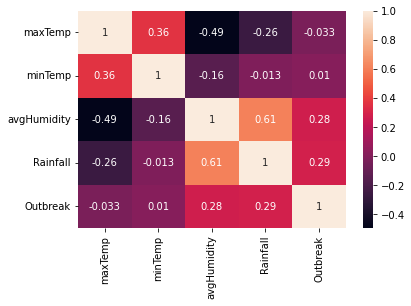

In [27]:
#plot of correlation matrix using  heat map
from sklearn import datasets  
import pandas as p  
import seaborn  
import matplotlib. pyplot as pt
heatmap = seaborn. heatmap(matrix, annot = True)  
pt. show ()  

In [15]:
X=df.iloc[:,:-1].values #iloc==>index location 2D array
Y=df.iloc[:,-1:].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
#Normalizing the data-Standard Scalar
from sklearn.preprocessing  import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)
X_test=sst.transform(X_test)

In [18]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [19]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [20]:
y_pred=model.predict(X_test)

In [21]:
model.score(sst.transform(X),Y) 

0.6923076923076923

In [22]:
model.score(X_train,Y_train)

0.7

In [23]:
model.score(X_test,Y_test)

0.6666666666666666